# Import Data

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
u98_nominal = pd.read_csv('/Users/Mahdi/quera_ai/projects/project1/Iranian_HEIS/data/income_datasets/family_incomes_dataset_u98.csv')
u99_nominal = pd.read_csv('/Users/Mahdi/quera_ai/projects/project1/Iranian_HEIS/data/income_datasets/family_incomes_dataset_u99.csv')
u1400_nominal = pd.read_csv('/Users/Mahdi/quera_ai/projects/project1/Iranian_HEIS/data/income_datasets/family_incomes_dataset_u1400.csv')
u1401_nominal = pd.read_csv('/Users/Mahdi/quera_ai/projects/project1/Iranian_HEIS/data/income_datasets/family_incomes_dataset_u1401.csv')
r99_nominal = pd.read_csv('/Users/Mahdi/quera_ai/projects/project1/Iranian_HEIS/data/income_datasets/family_incomes_dataset_r98.csv')
r98_nominal = pd.read_csv('/Users/Mahdi/quera_ai/projects/project1/Iranian_HEIS/data/income_datasets/family_incomes_dataset_r99.csv')
r1400_nominal = pd.read_csv('/Users/Mahdi/quera_ai/projects/project1/Iranian_HEIS/data/income_datasets/family_incomes_dataset_r1400.csv')
r1401_nominal = pd.read_csv('/Users/Mahdi/quera_ai/projects/project1/Iranian_HEIS/data/income_datasets/family_incomes_dataset_r1401.csv')
nominal_year_1398 = pd.concat([u98_nominal, r98_nominal], axis=0)
nominal_year_1399 = pd.concat([u99_nominal, r99_nominal], axis=0)
nominal_year_1400 = pd.concat([u1400_nominal, r1400_nominal], axis=0)
nominal_year_1401 = pd.concat([u1401_nominal, r1401_nominal], axis=0)

# Calculate Real Income by Inflation

In [114]:
def calculate_real_income(nominal_df, inflation_rate):
    real_data = nominal_df.copy()
    real_data['total_netincome'] = real_data['total_netincome'] / (1 + inflation_rate)
    return real_data

In [115]:
year_1398_inflation_rate= 0.412
year_1399_inflation_rate= 0.471
year_1400_inflation_rate= 0.462
year_1401_inflation_rate= 0.465
real_year_1398 = calculate_real_income(nominal_year_1398, year_1398_inflation_rate)
real_year_1399 = calculate_real_income(nominal_year_1399, year_1399_inflation_rate)
real_year_1400 = calculate_real_income(nominal_year_1400, year_1400_inflation_rate)
real_year_1401 = calculate_real_income(nominal_year_1401, year_1401_inflation_rate)

# drop_outliers functions and hist_plot function

In [116]:
def drop_iqr_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

def drop_outliers(df):
    df = drop_iqr_outliers(df, ['total_netincome'])
    df = df[df['total_netincome']>0]
    return df

def hist_plot(title, x_label, y_label, *data_list):
    for i, data in enumerate(reversed(data_list)):
        df = drop_outliers(data)
        plt.hist(df['total_netincome'], bins=100, alpha=0.7, edgecolor='black', label=f'Year {1398 + i}')
    
    
    plt.xlabel(f'{x_label}')
    plt.ylabel(f'{y_label}')
    plt.title(f'{title}')
    plt.legend()
    plt.show()
    
 

# Nominal and Real Family Income by Years

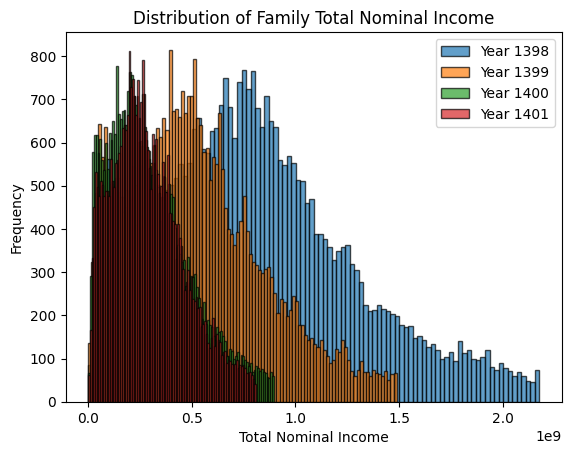

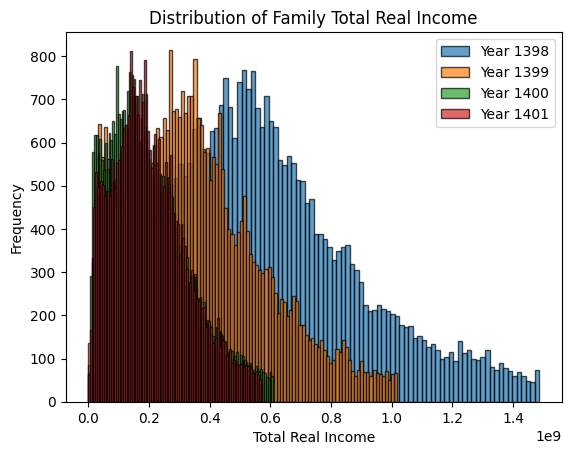

In [117]:
title = 'Distribution of Family Total Nominal Income'
x_label= 'Total Nominal Income'
y_label= 'Frequency'
hist_plot(title, x_label, y_label, nominal_year_1398, nominal_year_1399, nominal_year_1400, nominal_year_1401)
title = 'Distribution of Family Total Real Income'
x_label= 'Total Real Income'
y_label= 'Frequency'
hist_plot(title, x_label , y_label, real_year_1398, real_year_1399, real_year_1400, real_year_1401)